<a name='1'></a>
# Lab4 Initialization
Ініціалізація

## 1 - Packages

Перевірте ще раз, чи встановлені у вас наступні пакети:

### v1.1

In [34]:
!pip install dlai_tools

!pip install tensorflow

798408.26s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


798416.24s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 MB 2.3 MB/s eta 0:00:0000:0100:03
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.1/418.1 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.4/671.4 kB 3.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 3.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Imports and setup code:

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from public_tests import *
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

# load image dataset: blue/red dots in circles
# train_X, train_Y, test_X, test_Y = load_dataset()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
## 2 - Loading the Dataset

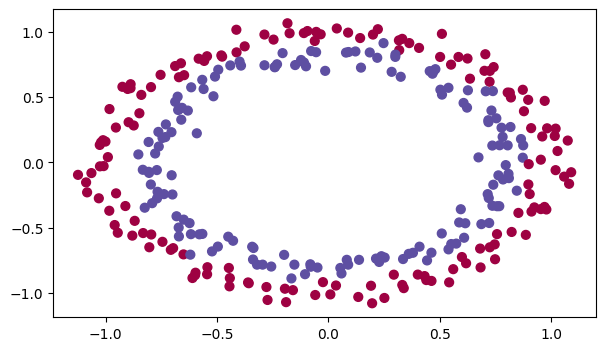

In [37]:
train_X, train_Y, test_X, test_Y = load_dataset()

Для цього класифікатора вам потрібно розділити сині крапки від червоних крапок.

<a name='3'></a>
## 3 - Модель нейронної мережі

Ви будете використовувати 3-шарову нейронну мережу (вже реалізовану для вас). Ось методи ініціалізації, з якими ви експериментуватимете:

* *Ініціалізація нулями* — встановити `initialization = "zeros"` у вхідному аргументі.
* *Випадкова ініціалізація* — встановити `initialization = "random"` у вхідному аргументі. Це ініціалізує ваги великими випадковими значеннями.
* *Ініціалізація за Хе* — встановити `initialization = "he"` у вхідному аргументі. Це ініціалізує ваги випадковими значеннями, масштабованими відповідно до статті Хе та співавт., 2015.

**Інструкції**: Ознайомтеся з кодом нижче та запустіть його. У наступній частині ви реалізуєте три методи ініціалізації, які викликає ця функція `model()`.


In [38]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = "he"):
    """
    Реалізує трьошарову нейронну мережу: 
    LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- вхідні дані, форма (кількість вхідних ознак, кількість прикладів)
    Y -- вектор правильних міток (0 або 1), форма (1, кількість прикладів)
    learning_rate -- швидкість навчання для градієнтного спуску
    num_iterations -- кількість ітерацій для градієнтного спуску
    print_cost -- якщо True, друкує значення функції вартості кожні 1000 ітерацій
    initialization -- спосіб ініціалізації параметрів ("zeros", "random" або "he")
    
    Returns:
    parameters -- навчені параметри мережі (ваги і біаси)
    """
        
    grads = {}
    costs = [] # щоб відстежувати втрати
    m = X.shape[1] # number of examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # Ініціалізувати словник параметрів.
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Loop (gradient descent)

    for i in range(num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        a3, cache = forward_propagation(X, parameters)
        
        # Функція втрат (Loss)
        cost = compute_loss(a3, Y)

        # Зворотне поширення (Backward propagation).
        grads = backward_propagation(X, Y, cache)
        
        # Оновлення параметрів .
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Виводимо вартість (cost) кожні 100 ітерацій
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)
            
    # plot the loss
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

<a name='4'></a>
## 4 - Ініціалізація нулями

У нейронній мережі потрібно ініціалізувати два типи параметрів:
- матриці ваг $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- вектори зсуву (bias) $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

<a name='ex-1'></a>
### Вправа 1 — initialize_parameters_zeros

Реалізуйте наступну функцію для ініціалізації всіх параметрів нулями. Пізніше ви побачите, що це працює погано, оскільки не дозволяє "порушити симетрію", але спробуйте все одно і подивіться, що станеться. Використовуйте np.zeros((..,..)) з правильними розмірами.

In [39]:
def initialize_parameters_zeros(layers_dims):
    """
Аргументи:
layer_dims — масив Python (список), що містить розмір кожного шару.

Повертає:
parameters — словник Python, який містить ваші параметри "W1", "b1", ..., "WL", "bL":
W1 — матриця ваг розміром (layers_dims[1], layers_dims[0])
b1 — вектор зсуву (біас) розміром (layers_dims[1], 1)
WL — матриця ваг розміром (layers_dims[L], layers_dims[L-1])
bL — вектор зсуву (біас) розміром (layers_dims\L], 1)
"""

    parameters = {}
    L = len(layers_dims)            # кількість шарів у мережі
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return parameters

In [40]:
parameters = initialize_parameters_zeros([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_zeros_test(initialize_parameters_zeros)


W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]
 All tests passed.


Запустіть наступний код, щоб навчити вашу модель протягом 15 000 ітерацій, використовуючи ініціалізацію нулями.

Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599453
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


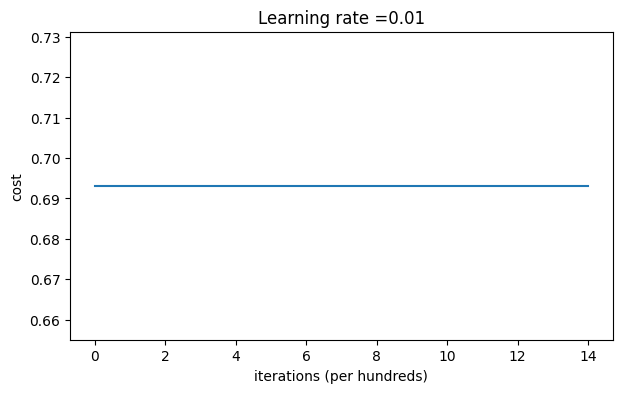

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [41]:
parameters = model(train_X, train_Y, initialization = "zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Продуктивність дуже погана, вартість не знижується, і алгоритм працює не краще випадкового вгадування. Чому? Погляньте на деталі передбачень і межу прийняття рішень:

In [42]:
print ("predictions_train = " + str(predictions_train))
print ("predictions_test = " + str(predictions_test))

predictions_train = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test = [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


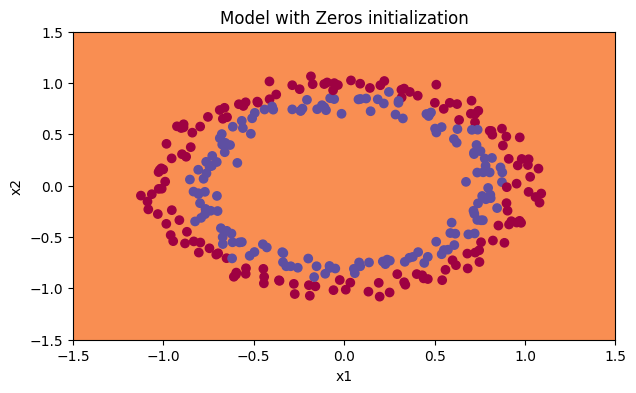

In [43]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Для докладного пояснення цього можна прочитати допис *Пола Мілеке* — [Symmetry Breaking versus Zero Initialization](https://community.deeplearning.ai/t/symmetry-breaking-versus-zero-initialization/16061).

Нижче наведено спрощене пояснення:

**Примітка:** Для спрощення всі обчислення виконуються з одним прикладом за раз.

Оскільки ваги та біаси рівні нулю, множення на ваги дає нульовий вектор, який при активації ReLU дає 0, бо `z = 0`.

$$a = ReLU(z) = max(0, z) = 0$$

На класифікаційному шарі, де функція активації — sigmoid, ви отримуєте (для будь-якого вхідного значення):

$$\sigma(z) = \frac{1}{ 1 + e^{-(z)}} = \frac{1}{2} = y_{pred}$$

Оскільки для кожного прикладу ви отримуєте ймовірність 0.5, наша функція вартості не може ефективно коригувати ваги.

Ваша функція втрат:
$$ \mathcal{L}(a, y) =  - y  \ln(y_{pred}) - (1-y)  \ln(1-y_{pred})$$

For `y=1`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 1) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

For `y=0`, `y_pred=0.5` it becomes:

$$ \mathcal{L}(0, 0) =  - (1)  \ln(\frac{1}{2}) = 0.6931471805599453$$

Як бачите, при прогнозі 0.5, незалежно від того, чи справжнє значення (`y`) дорівнює 1 або 0, ви отримуєте однакове значення втрат для обох випадків. Через це жодна вага не оновлюється, і ви застрягаєте з тими самими початковими вагами.

Ось чому модель передбачає 0 для кожного прикладу! Не дивно, що її продуктивність така погана.

Загалом, ініціалізація всіх ваг нулями призводить до того, що мережа не може порушити симетрію. Це означає, що кожен нейрон у шарі вчиться однаковим речам, тож ви ніби тренуєте мережу, де кількість нейронів у кожному шарі дорівнює 1. В результаті мережа не є потужнішою за лінійний класифікатор, наприклад логістичну регресію.


<font color='blue'>
    
**Що варто запам’ятати**:

* Ваги $W^{[l]}$ потрібно ініціалізувати випадковим чином, щоб порушити симетрію.
* Однак біаси $b^{[l]}$ можна ініціалізувати нулями. Симетрія все одно буде порушена, якщо $W^{[l]}$ ініціалізовані випадково.


<a name='5'></a>
## 5 - Випадкова ініціалізація

Щоб порушити симетрію, ініціалізуйте ваги випадковим чином. Після такої ініціалізації кожен нейрон зможе навчитися різним функціям від своїх вхідних даних. У цій вправі ви побачите, що відбувається, коли ваги ініціалізуються випадковими, але дуже великими значеннями.

<a name='ex-2'></a>

### Вправа 2 — initialize\_parameters\_random

Реалізуйте функцію для ініціалізації ваг великими випадковими значеннями (масштабованими на \*10) і біасів нулями. Використовуйте `np.random.randn(.., ..) * 10` для ваг і `np.zeros((.., ..))` для біасів. Ви використовуєте фіксований `np.random.seed(..)`, щоб ваші "випадкові" ваги збігалися з нашими, тому не хвилюйтеся, якщо при кількох запусках коду ви отримуєте одні й ті ж початкові значення параметрів.


In [44]:
def initialize_parameters_random(layers_dims):
    """
Аргументи:
layer\_dims — масив Python (список), що містить розмір кожного шару.

Повертає:
parameters — словник Python, який містить ваші параметри "W1", "b1", ..., "WL", "bL":
W1 — матриця ваг розміром (layers\_dims\[1], layers\_dims\[0])
b1 — вектор зсуву (біас) розміром (layers\_dims\[1], 1)
...
WL — матриця ваг розміром (layers\_dims\[L], layers\_dims\[L-1])
bL — вектор зсуву (біас) розміром (layers\_dims\[L], 1)
"""
    
    import numpy as np
    np.random.seed(3)
    
    parameters = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        # Ваги ініціалізуємо великими випадковими числами, помноженими на 10
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        # Зсуви ініціалізуємо нулями
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters


In [45]:
parameters = initialize_parameters_random([3, 2, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))
initialize_parameters_random_test(initialize_parameters_random)

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]
 All tests passed.


Запустіть наступний код, щоб навчити вашу модель протягом 15 000 ітерацій, використовуючи випадкову ініціалізацію.

/Users/boykosvitlana/Downloads/dl_lab4/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/boykosvitlana/Downloads/dl_lab4/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 0: inf
Cost after iteration 1000: 0.6243608083761976
Cost after iteration 2000: 0.5979255420418802
Cost after iteration 3000: 0.5636974033624995
Cost after iteration 4000: 0.550129435783533
Cost after iteration 5000: 0.5444127596753244
Cost after iteration 6000: 0.5374134745412525
Cost after iteration 7000: 0.4738098425592898
Cost after iteration 8000: 0.3977585829307016
Cost after iteration 9000: 0.3934706020369666
Cost after iteration 10000: 0.39202176138493355
Cost after iteration 11000: 0.3892161604894328
Cost after iteration 12000: 0.3861393388253537
Cost after iteration 13000: 0.3849794626808294
Cost after iteration 14000: 0.38278262086755843


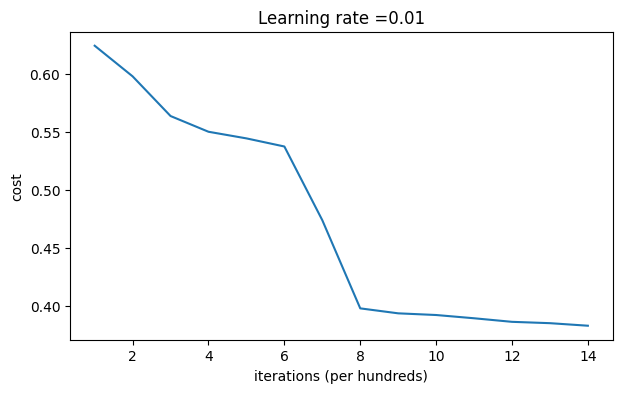

On the train set:
Accuracy: 0.83
On the test set:
Accuracy: 0.86


In [46]:
parameters = model(train_X, train_Y, initialization = "random")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Якщо після ітерації 0 у вас з'являється значення "inf" у вартості, це через числові округлення. Більш точна реалізація могла б це виправити, але для цілей цього ноутбука турбуватися про це не варто.

У будь-якому випадку, тепер симетрія порушена, і це дає помітно кращу точність, ніж раніше. Модель більше не видає всі 0. Прогрес!

In [47]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


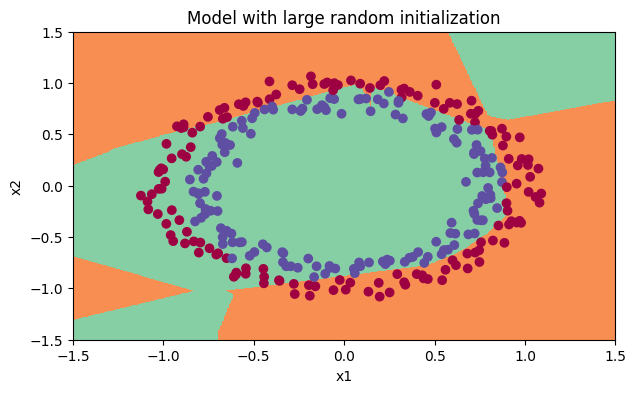

In [48]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Спостереження**:

* Вартість спочатку дуже висока. Це тому, що при великих випадкових значеннях ваг остання активація (sigmoid) видає результати, дуже близькі до 0 або 1 для деяких прикладів, і коли вона помиляється, втрата для цього прикладу стає дуже великою. Справді, коли $\log(a^{[3]}) = \log(0)$, втрата прагне до нескінченності.
* Погана ініціалізація може призводити до зникнення або вибуху градієнтів, що також уповільнює алгоритм оптимізації.
* Якщо тренувати мережу довше, результати покращаться, але ініціалізація занадто великими випадковими числами сповільнює оптимізацію.

<font color='blue'>

**Підсумок**:

* Ініціалізація ваг дуже великими випадковими значеннями працює погано.
* Ініціалізація малими випадковими значеннями має давати кращі результати. Головне питання: наскільки маленькими мають бути ці випадкові значення? Давайте дізнаємось далі!

<font color='black'>

**Додаткове читання:**

Основна відмінність між гаусівською змінною (`numpy.random.randn()`) та рівномірною випадковою змінною в розподілі згенерованих чисел:

* `numpy.random.rand()` генерує числа з [рівномірного розподілу](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/rand.jpg).
* `numpy.random.randn()` генерує числа з [нормального розподілу](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/randn.jpg).

При використанні для ініціалізації ваг, `randn()` допомагає уникнути розподілу ваг на крайні значення, розподіляючи більшість ваг ближче до центру діапазону.

Інтуїтивно це можна побачити на прикладі [функції активації sigmoid()](https://raw.githubusercontent.com/jahnog/deeplearning-notes/master/Course2/images/sigmoid.jpg).

Пам’ятаєте, що нахил sigmoid поблизу 0 або 1 дуже малий, тому ваги, які потрапляють у ці крайні області, будуть збігатися до розв’язку значно повільніше, а більшість ваг у центрі прискорює збіжність.


<a name='6'></a>
## 6 - He Initialization
## 6 - Ініціалізація за Хе

Нарешті, спробуйте "Ініціалізацію за Хе" — названу на честь першого автора статті He et al., 2015. (Якщо ви чули про "ініціалізацію Ксав’єра" (Xavier initialization), то це схоже, але там для масштабування ваг $W^{[l]}$ використовується коефіцієнт `sqrt(1./layers_dims[l-1])` тоді як ініціалізація за Хе використовує`sqrt(2./layers_dims[l-1])`.)

<a name='ex-3'></a>
### Вправа 3 — initialize\_parameters\_he

Реалізуйте функцію для ініціалізації параметрів за допомогою ініціалізації за Хе. Ця функція схожа на попередню `initialize_parameters_random(...)`. Єдина відмінність у тому, що замість множення `np.random.randn(..,..)` на 10, ви множите на $\sqrt{\frac{2}{\text{розмір попереднього шару}}}$, що рекомендується для шарів з активацією ReLU.


In [49]:
def initialize_parameters_he(layers_dims):
    """
Аргументи:
layer\_dims — масив Python (список), що містить розмір кожного шару.

Повертає:
parameters — словник Python, який містить ваші параметри "W1", "b1", ..., "WL", "bL":
W1 — матриця ваг розміром (layers\_dims\[1], layers\_dims\[0])
b1 — вектор зсуву (біас) розміром (layers\_dims\[1], 1)
...
WL — матриця ваг розміром (layers\_dims\[L], layers\_dims\[L-1])
bL — вектор зсуву (біас) розміром (layers\_dims\[L], 1)
"""

    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # ціле число, що позначає кількість шарів
     
    for l in range(1, L + 1):

        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

In [50]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

initialize_parameters_he_test(initialize_parameters_he)
# parameters

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]
 All tests passed.


**Expected output**

```
W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.] [0.] [0.] [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]
```

Запустіть наступний код, щоб навчити вашу модель протягом 15 000 ітерацій, використовуючи ініціалізацію за Хе.

Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.41386458170717944
Cost after iteration 7000: 0.31178034648444414
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206836
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273551
Cost after iteration 12000: 0.09917746546525931
Cost after iteration 13000: 0.08457055954024283
Cost after iteration 14000: 0.07357895962677367


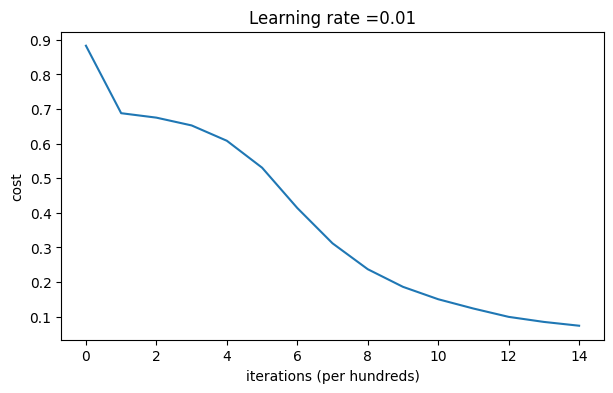

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [51]:
parameters = model(train_X, train_Y, initialization = "he")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

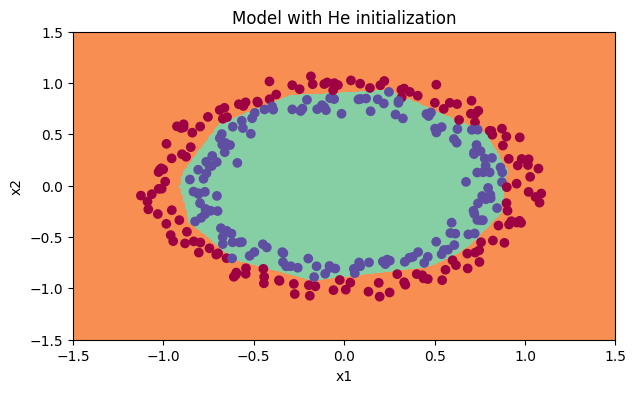

In [52]:
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Спостереження**:
* Модель з ініціалізацією за Хе дуже добре розділяє сині та червоні точки вже за невелику кількість ітерацій.

<a name='7'></a>
## 7 - Висновки

Ви спробували три різні типи ініціалізацій. При однаковій кількості ітерацій та однакових гіперпараметрах порівняння виглядає так:


<table> 
    <tr>
        <td>
            <b>Model</b>
        </td>
        <td>
            <b>Train accuracy</b>
        </td>
        <td>
            <b>Problem/Comment</b>
        </td>
    </tr>
        <td>
        3-layer NN with zeros initialization
        </td>
        <td>
        50%
        </td>
        <td>
        fails to break symmetry
        </td>
    <tr>
        <td>
        3-layer NN with large random initialization
        </td>
        <td>
        83%
        </td>
        <td>
        too large weights 
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with He initialization
        </td>
        <td>
        99%
        </td>
        <td>
        recommended method
        </td>
    </tr>
</table> 

**Вітаю**! Ви завершили цей ноутбук з теми ініціалізації.

Ось короткий підсумок основних висновків:

<font color='blue'>

* Різні способи ініціалізації дають дуже різні результати
* Випадкова ініціалізація потрібна, щоб порушити симетрію і забезпечити, щоб різні приховані нейрони навчалися різним речам
* Уникайте ініціалізації занадто великими значеннями!
* Ініціалізація за Хе добре працює для мереж з активацією ReLU

<font color='black'>


# Regularization

<a name='1'></a>
## 8 - Packages

In [53]:
### v1.1

In [54]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
from testCases import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name='2'></a>
## 9 - Регуляризація. Постановка задачі

Вас щойно найняли як експерта з ШІ у Французьку футбольну корпорацію. Вони хочуть, щоб ви порадили, в які позиції воротар Франції повинен бити м’яч, щоб гравці французької команди могли потім відбивати його головою.

<img src="images/field_kiank.png" style="width:600px;height:350px;">

<caption><center><font color='purple'><b>Figure 1</b>: Футбольне поле. Воротар б’є м’яч у повітря, а гравці обох команд борються, щоб першими ударити м’яч головою. </font></center></caption>


Вам надали наступний двовимірний набір даних з останніх 10 ігор збірної Франції.

<a name='3'></a>
## 10 - Loading the Dataset

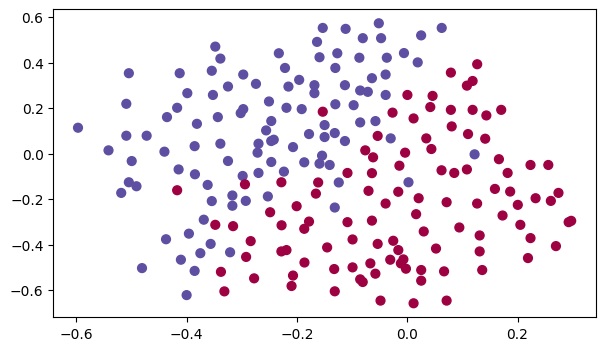

In [55]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Кожна точка відповідає позиції на футбольному полі, де гравець ударив м’яч головою після того, як воротар збірної Франції ударив м’яч з лівої сторони поля.

* Якщо точка синя — це означає, що гравець Франції зміг ударити м’яч головою
* Якщо точка червона — це означає, що м’яч ударив гравець протилежної команди

**Ваше завдання**: Використати модель глибокого навчання, щоб знайти позиції на полі, куди воротар повинен бити м’яч.

**Аналіз набору даних**: Цей набір даних трохи зашумлений, але схоже, що діагональна лінія, яка розділяє верхню ліву половину (сині точки) від нижньої правої (червоні точки), буде добре працювати.

Спочатку ви спробуєте модель без регуляризації. Потім навчитесь, як застосовувати регуляризацію, і вирішите, яку модель обрати для розв’язання задачі Французької футбольної корпорації.


<a name='4'></a>

## 11 - Модель без регуляризації

Ви будете використовувати наступну нейронну мережу (вже реалізовану для вас нижче). Цю модель можна запускати у двох режимах:

* *режим регуляризації* — встановивши параметр `lambd` у ненульове значення. Використовуємо "`lambd`" замість "`lambda`", бо "`lambda`" — зарезервоване слово в Python.
* *режим Dropout* — встановивши параметр `keep_prob` у значення менше за 1.

Спочатку ви спробуєте модель без будь-якої регуляризації. Потім реалізуєте:

* *L2 регуляризацію* — функції "`compute_cost_with_regularization()`" і "`backward_propagation_with_regularization()`"
* *Dropout* — функції "`forward_propagation_with_dropout()`" і "`backward_propagation_with_dropout()`"

У кожній частині ви запустите модель із відповідними параметрами, щоб вона викликала ваші реалізовані функції. Ознайомтеся з кодом нижче, щоб зрозуміти структуру моделі.


In [56]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
Реалізує тришарову нейронну мережу: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

Аргументи:
X -- вхідні дані, розмір (розмір входу, кількість прикладів)
Y -- вектор правильних міток (1 для синьої точки / 0 для червоної), розмір (розмір виходу, кількість прикладів)
learning\_rate -- швидкість навчання оптимізації
num\_iterations -- кількість ітерацій циклу оптимізації
print\_cost -- якщо True, друкує значення функції втрат кожні 10000 ітерацій
lambd -- гіперпараметр регуляризації, скаляр
keep\_prob -- ймовірність збереження нейрона активним під час дроп-ауту, скаляр

Повертає:
parameters -- параметри, які модель навчила; їх можна використовувати для передбачень.
"""
        
    grads = {}
    costs = []                            # щоб відстежувати значення функції втрат
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Прясе поширення (Forward propagation): LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Обчислення вартості(Cost function)
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # ЗВОРОТНЕ ПОШИРЕННЯ (Backward propagation).
        assert (lambd == 0 or keep_prob == 1)   # можна використовувати одночасно і L2 регуляризацію, і дроп-аут,
                                                # але в цьому завданні досліджуватиметься лише один метод за раз

        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # ОНОВЛЕННЯ ПАРАМЕТРІВ.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Давайте навчимо модель без регуляризації та подивимось на точність на тренувальному та тестовому наборах.

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724207
Cost after iteration 20000: 0.1385164242326793


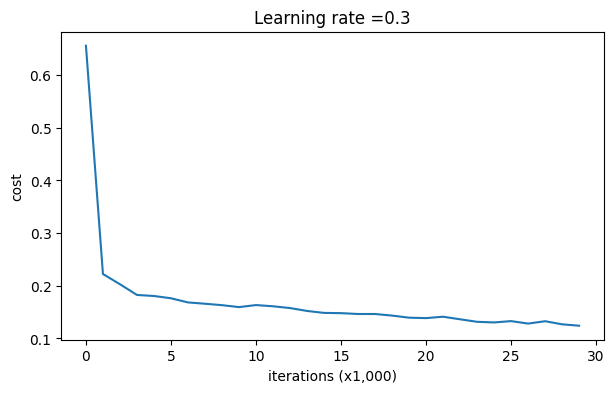

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [57]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Точність на тренуванні становить 94.8%, а на тесті — 91.5%. Це є **базова модель** (далі ви побачите, як регуляризація впливає на неї). Запустіть наступний код, щоб побудувати межу прийняття рішення вашої моделі.


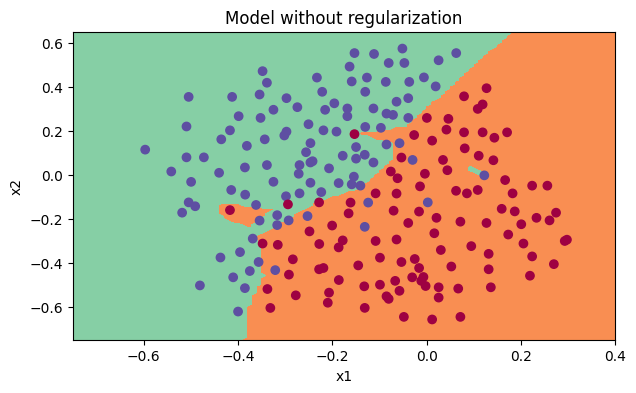

In [58]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Модель без регуляризації явно переобучається на тренувальних даних — вона підлаштовується під шумні точки! Тепер давайте розглянемо два методи, які допоможуть зменшити переобучення.

<a name='5'></a>
## 12 - L2 Регуляризація

Стандартний спосіб уникнути перенавчання називається **L2 регуляризацією**. Він полягає у відповідній зміні вашої функції втрат, а саме:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences.

<a name='ex-1'></a>

### Завдання 4 - compute\_cost\_with\_regularization

Реалізуйте функцію `compute_cost_with_regularization()`, яка обчислює вартість згідно з формулою (2). Для обчислення $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Зверніть увагу, що це потрібно зробити для $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, потім скласти три доданки та помножити на$ \frac{1}{m} \frac{\lambda}{2} $.

In [59]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
Реалізує функцію вартості з L2 регуляризацією. Дивіться формулу (2) вище.

Аргументи:
A3 -- вихід після активації, результат прямого проходження, розмір (розмір виходу, кількість прикладів)
Y -- вектор правильних міток, розмір (розмір виходу, кількість прикладів)
parameters -- словник Python, що містить параметри моделі

Повертає:
cost -- значення регуляризованої функції втрат (формула (2))

"""

    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # Це дає вам частину функції втрат, що відповідає перехресній ентропії
    
    L2_regularization_cost = (lambd/(2*m)) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [62]:
A3, t_Y, parameters = compute_cost_with_regularization_test_case()
cost = compute_cost_with_regularization(A3, t_Y, parameters, lambd=0.1)
print("cost = " + str(cost))

compute_cost_with_regularization_test(compute_cost_with_regularization)

cost = 1.7864859451590758
 All tests passed.


Звісно, оскільки ви змінили функцію втрат, потрібно також змінити й зворотне поширення! Усі градієнти тепер мають обчислюватися відносно нової функції втрат.

<a name='ex-2'></a>

### Завдання 5 – backward\_propagation\_with\_regularization

Реалізуйте зміни у зворотному поширенні, щоб врахувати регуляризацію. Зміни стосуються лише змінних `dW1`, `dW2` та `dW3`. Для кожної з них потрібно додати градієнт регуляризаційного доданку:
($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [66]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Реалізує зворотне поширення (backward propagation) для базової моделі з доданою L2-регуляризацією.
    
    Аргументи:
    X -- вхідний набір даних, розмір (розмір входу, кількість прикладів)
    Y -- вектор "правильних" міток, розмір (розмір виходу, кількість прикладів)
    cache -- збережені значення з forward_propagation()
    lambd -- гіперпараметр регуляризації, скаляр
    
    Повертає:
    gradients -- словник з градієнтами відносно кожного параметра, активації та змінних до активації
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y

    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd/m) * W3
    
    db3 = 1. / m * np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    #(≈ 1 lines of code)
    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd/m) * W2
 
    db2 = 1. / m * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))

    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd/m) * W1

    db1 = 1. / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [67]:
t_X, t_Y, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(t_X, t_Y, cache, lambd = 0.7)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("dW3 = \n"+ str(grads["dW3"]))
backward_propagation_with_regularization_test(backward_propagation_with_regularization)

dW1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = 
[[-1.77691347 -0.11832879 -0.09397446]]
 All tests passed.


Тепер запустімо модель з **L2-регуляризацією** при \$\lambda = 0{,}7\$. Функція `model()` викликає:

* `compute_cost_with_regularization` замість `compute_cost`
* `backward_propagation_with_regularization` замість `backward_propagation`

Це дозволить зменшити переобучення (overfitting), обмеживши надто великі значення ваг.


Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


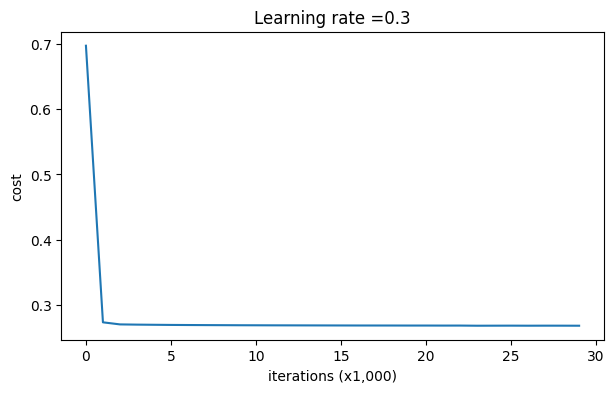

On the train set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.93


In [69]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Вітаємо! Точність на тестовому наборі зросла до **93%** — ви врятували французьку футбольну команду! 🇫🇷⚽

Модель більше **не перенавчається** — вона не намагається вивчити шум у тренувальних даних. Тепер побудуємо **межу прийняття рішень** (decision boundary), щоб візуально оцінити, як добре мережа розділяє зони, де воротар повинен бити м’яч.

Продовжуйте запуск коду, щоб побачити графік.

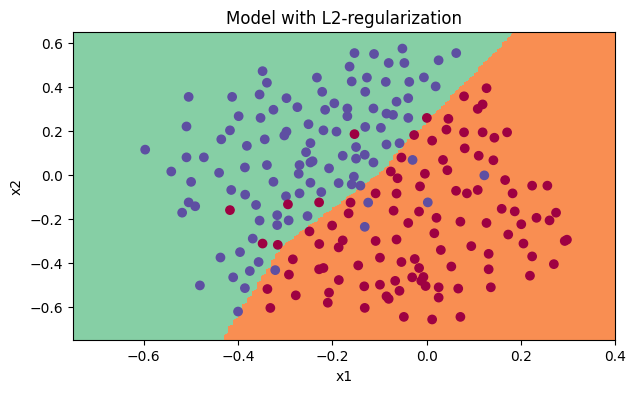

In [70]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


**Спостереження**:

* Значення \$\lambda\$ — це гіперпараметр, який можна налаштувати за допомогою валідаційного набору (dev set).
* L2-регуляризація робить межу класифікації (decision boundary) гладшою. Якщо \$\lambda\$ занадто велике, модель може стати "надто згладженою", що призведе до високого зміщення (high bias).

**Що насправді робить L2-регуляризація?**:

L2-регуляризація ґрунтується на припущенні, що модель з меншими вагами є простішою за модель з великими вагами. Отже, штрафуючи великі значення ваг у функції втрат (cost function), ми змушуємо всі ваги ставати меншими. Великі ваги стають надто "дорогими" з точки зору функції втрат! Це призводить до згладженої моделі, в якій вихід змінюється повільніше зі зміною вхідних даних.

**Що слід запам’ятати:** наслідки L2-регуляризації:

* **Обчислення вартості:**

  * До функції вартості додається регуляризаційний доданок.
* **Зворотне поширення:**

  * До градієнтів по відношенню до матриць ваг додаються додаткові члени.
* **Ваги стають меншими ("згасання ваг"):**

  * Ваги зменшуються.


<a name='6'></a>

## 13 – Dropout (Відсікання нейронів)

Нарешті, **dropout** — це широко використовувана техніка регуляризації, яка є специфічною для глибокого навчання.
**Вона випадковим чином "вимикає" деякі нейрони під час кожної ітерації.** Перегляньте ці два відео, щоб краще зрозуміти, що це означає!


<!--
To understand drop-out, consider this conversation with a friend:
- Friend: "Why do you need all these neurons to train your network and classify images?". 
- You: "Because each neuron contains a weight and can learn specific features/details/shape of an image. The more neurons I have, the more featurse my model learns!"
- Friend: "I see, but are you sure that your neurons are learning different features and not all the same features?"
- You: "Good point... Neurons in the same layer actually don't talk to each other. It should be definitly possible that they learn the same image features/shapes/forms/details... which would be redundant. There should be a solution."
!--> 


<center>
<video width="620" height="440" src="images/dropout1_kiank.mp4" type="video/mp4" controls>
</video>
</center>
<br>
<caption><center><font color='purple'><b>Figure 2 </b>: <b>Drop-out on the second hidden layer.</b> <br> At each iteration, you shut down (= set to zero) each neuron of a layer with probability $1 - keep\_prob$ or keep it with probability $keep\_prob$ (50% here). The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration. </font></center></caption>

<center>
<video width="620" height="440" src="images/dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><center><font color='purple'><b>Figure 3</b>:<b> Drop-out on the first and third hidden layers. </b><br> $1^{st}$ layer: we shut down on average 40% of the neurons.  $3^{rd}$ layer: we shut down on average 20% of the neurons. </font></center></caption>


Коли ви «вимикаєте» деякі нейрони, ви фактично модифікуєте свою модель. Ідея dropout полягає в тому, що на кожній ітерації ви навчаєте іншу модель, яка використовує лише підмножину ваших нейронів. Завдяки dropout нейрони стають менш чутливими до активації інших конкретних нейронів, оскільки ці інші нейрони можуть бути вимкнені у будь-який момент.

<a name='6-1'></a>

### 13.1 – Пряме поширення з Dropout (forward propagation with dropout)

<a name='ex-3'></a>

### Вправа 6 – forward\_propagation\_with\_dropout

Реалізуйте пряме поширення з dropout. Ви використовуєте трирівневу нейронну мережу і додасте dropout до першого і другого прихованих шарів. Ми не будемо застосовувати dropout до вхідного або вихідного шару.

**Інструкції**:
Ви хочете «вимикати» деякі нейрони в першому та другому шарах. Для цього ви виконаєте 4 кроки:

1. На лекції ми обговорювали створення змінної \$d^{}\ d^{ }\ ...\ d^{[1](m)}]\$, яка має ту саму форму, що й \$A^{\[1]}\$.

2. Встановіть кожен елемент \$D^{\[1]}\$ рівним 1 з імовірністю `keep_prob` і 0 в іншому випадку.

**Підказка:**
Припустимо, `keep_prob = 0.8`, тобто ми хочемо зберегти приблизно 80% нейронів і вимкнути близько 20% з них. Ми хочемо згенерувати вектор, який містить 1 та 0, де близько 80% елементів — це 1, а близько 20% — це 0.
This python statement:  `X = (X < keep_prob).astype(int)`  

is conceptually the same as this if-else statement (for the simple case of a one-dimensional array) :

```
for i,v in enumerate(x):
    if v < keep_prob:
        x[i] = 1
    else: # v >= keep_prob
        x[i] = 0
```
Зверніть увагу, що `X = (X < keep_prob).astype(int)` працює з багатовимірними масивами, і отриманий результат зберігає розміри вхідного масиву.

Також зауважте, що без використання `.astype(int)` результатом буде масив булевих значень `True` та `False`, які Python автоматично перетворює на 1 та 0 при множенні з числами. (Однак краще явно конвертувати дані у потрібний тип, тому рекомендується використовувати `.astype(int)`.)

3. Присвойте \$A^{\[1]}\$ значення \$A^{\[1]} \* D^{\[1]}\$. (Ви вимикаєте деякі нейрони). Можна уявити \$D^{\[1]}\$ як маску, яка при множенні з матрицею «вимикає» певні значення.

4. Поділіть \$A^{\[1]}\$ на `keep_prob`. Таким чином ви гарантуєте, що очікуване значення результату не зміниться порівняно з випадком без dropout. (Цю техніку називають «інвертований dropout»).


In [76]:
def forward_propagation_with_dropout(X, parameters, keep_prob=0.5):
    """
    Реалізує пряме поширення: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.

    Аргументи:
    X -- вхідні дані, розмірність (2, кількість прикладів)
    parameters -- словник параметрів: "W1", "b1", ..., "W3", "b3"
                  W1 -- матриця ваг розміром (20, 2)
                  b1 -- вектор зсуву розміром (20, 1)
                  W2 -- матриця ваг розміром (3, 20)
                  b2 -- вектор зсуву розміром (3, 1)
                  W3 -- матриця ваг розміром (1, 3)
                  b3 -- вектор зсуву розміром (1, 1)
    keep_prob -- ймовірність збереження нейрона активним під час дроп-ауту, скаляр

    Повертає:
    A3 -- остання активація (вихід мережі), розмірність (1, кількість прикладів)
    cache -- кортеж із проміжною інформацією для зворотного поширення
    """
    np.random.seed(1)

    # отримуємо параметри
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # Пряме поширення: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    # Кроки 1-4: застосування дроп-ауту до A1
    D1 = np.random.rand(A1.shape[0], A1.shape[1])  # Крок 1: створити випадкову матрицю D1 розміром як A1
    D1 = (D1 < keep_prob).astype(int)              # Крок 2: конвертувати в 0/1, де 1 з ймовірністю keep_prob
    A1 = A1 * D1                                   # Крок 3: "вимкнути" деякі нейрони A1 (маскування)
    A1 = A1 / keep_prob                            # Крок 4: масштабувати, щоб компенсувати відключені нейрони

    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)

    # Кроки 1-4: застосування дроп-ауту до A2
    D2 = np.random.rand(A2.shape[0], A2.shape[1])  # Крок 1: створити випадкову матрицю D2 розміром як A2
    D2 = (D2 < keep_prob).astype(int)              # Крок 2: конвертувати в 0/1, де 1 з ймовірністю keep_prob
    A2 = A2 * D2                                   # Крок 3: "вимкнути" деякі нейрони A2 (маскування)
    A2 = A2 / keep_prob                            # Крок 4: масштабувати, щоб компенсувати відключені нейрони

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache

In [77]:
t_X, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(t_X, parameters, keep_prob=0.7)
print ("A3 = " + str(A3))

forward_propagation_with_dropout_test(forward_propagation_with_dropout)

A3 = [[0.36974721 0.00305176 0.04565099 0.49683389 0.36974721]]
 All tests passed.



<a name='6-2'></a>

### 13.2 - Зворотне поширення з дроп-аутом (Dropout)

<a name='ex-4'></a>

### Вправа 7 - backward\_propagation\_with\_dropout

Реалізуйте зворотне поширення з дроп-аутом. Як і раніше, ви тренуєте трислойову мережу. Додайте дроп-аут до першого і другого прихованих шарів, використовуючи маски \$D^{\[1]}\$ та \$D^{\[2]}\$, які збережені в кеші.

**Інструкції:**
Зворотне поширення з дроп-аутом досить просте. Вам потрібно виконати 2 кроки:

1. Під час прямого поширення ви вимикали деякі нейрони, застосовуючи маску \$D^{\[1]}\$ до `A1`. Під час зворотного поширення потрібно вимкнути ті ж самі нейрони, повторно застосувавши цю ж маску \$D^{\[1]}\$ до `dA1`.
2. Під час прямого поширення ви ділили `A1` на `keep_prob`. Тому при зворотному поширенні потрібно також поділити `dA1` на `keep_prob` (математично це означає, що якщо \$A^{\[1]}\$ масштабовано на `keep_prob`, то його похідна \$dA^{\[1]}\$ теж масштабуватиметься на той самий коефіцієнт).


In [78]:
# GRADED FUNCTION: backward_propagation_with_dropout

def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Реалізує зворотне поширення для базової моделі, до якої додано дроп-аут.

    Аргументи:
    X -- вхідні дані, розмірність (2, кількість прикладів)
    Y -- вектор "справжніх" міток, розмірність (розмір виходу, кількість прикладів)
    cache -- кеш, отриманий з forward_propagation_with_dropout()
    keep_prob -- ймовірність збереження нейрона активним під час дроп-ауту, скаляр

    Повертає:
    gradients -- словник з градієнтами відносно кожного параметра, активацій та пре-активацій
    """

    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)

    # Крок 1: Застосувати маску D2, щоб "вимкнути" ті ж нейрони, що і під час прямого поширення
    dA2 = dA2 * D2

    # Крок 2: Масштабувати dA2, щоб компенсувати "вимкнені" нейрони
    dA2 = dA2 / keep_prob

    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)

    # Крок 1: Застосувати маску D1, щоб "вимкнути" ті ж нейрони, що і під час прямого поширення
    dA1 = dA1 * D1

    # Крок 2: Масштабувати dA1, щоб компенсувати "вимкнені" нейрони
    dA1 = dA1 / keep_prob

    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = {
        "dZ3": dZ3, "dW3": dW3, "db3": db3, "dA2": dA2,
        "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1,
        "dZ1": dZ1, "dW1": dW1, "db1": db1
    }

    return gradients


In [79]:
t_X, t_Y, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(t_X, t_Y, cache, keep_prob=0.8)

print ("dA1 = \n" + str(gradients["dA1"]))
print ("dA2 = \n" + str(gradients["dA2"]))

backward_propagation_with_dropout_test(backward_propagation_with_dropout)

dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]
 All tests passed.


Чудово! Тепер, щоб запустити модель із дроп-аутом (`keep_prob = 0.86`), тобі потрібно:

* Викликати `forward_propagation_with_dropout` замість звичайного `forward_propagation`.
* Викликати `backward_propagation_with_dropout` замість звичайного `backward_propagation`.

Так ти зможеш відслідкувати вплив дроп-ауту, коли кожен нейрон першого та другого шару буде випадково вимикатися з ймовірністю 14%.

Якщо хочеш, я можу допомогти з прикладом виклику функції `model()` з цими змінами. Хочеш?

Cost after iteration 0: 0.6543912405149825


/Users/boykosvitlana/Downloads/dl_lab4/reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/Users/boykosvitlana/Downloads/dl_lab4/reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.0610169865749056
Cost after iteration 20000: 0.060582435798513114


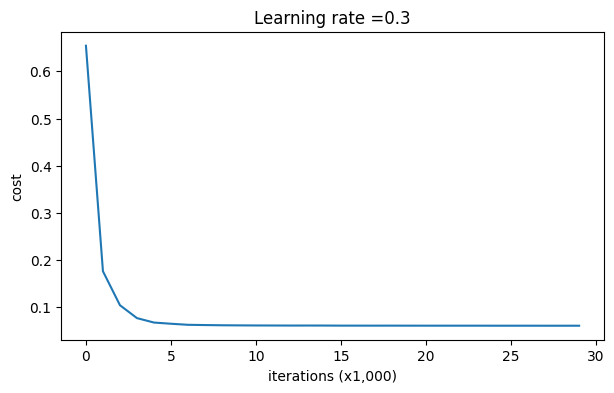

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [80]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Дроп-аут працює відмінно! Точність на тестовій вибірці знову зросла (до 95%)! Ваша модель не переобучається на тренувальних даних і чудово справляється з тестовими. Французька футбольна команда буде вам вічно вдячна!

Запустіть код нижче, щоб побудувати межу прийняття рішення.


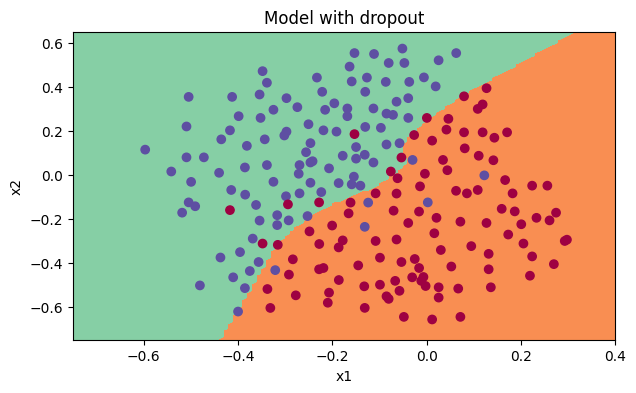

In [81]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Примітка**:

* **Поширена помилка** при використанні дроп-ауту — застосовувати його як під час навчання, так і під час тестування. Насправді дроп-аут (випадкове вимикання нейронів) слід застосовувати лише під час навчання.
* Фреймворки глибокого навчання, такі як [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/nn/dropout), [PaddlePaddle](https://www.paddlepaddle.org.cn/documentation/docs/en/api/paddle/nn/Dropout_en.html#dropout), [Keras](https://keras.io/api/layers/regularization_layers/dropout/) або [Caffe](https://caffe.berkeleyvision.org/doxygen/classcaffe_1_1DropoutLayer.html), вже мають вбудовані реалізації дроп-ауту. Не хвилюйтесь — скоро ви ознайомитесь з деякими з цих фреймворків.

<font color='blue'>

**Що варто запам’ятати про дроп-аут:**

* Дроп-аут — це техніка регуляризації.
* Дроп-аут використовують лише під час навчання. Не застосовуйте дроп-аут під час тестування.
* Дроп-аут застосовується і під час прямого (forward), і під час зворотного (backward) поширення.
* Під час навчання кожен шар з дроп-аутом потрібно масштабувати діленням на `keep_prob`, щоб зберегти однакове очікуване значення активацій. Наприклад, якщо `keep_prob` = 0.5, то в середньому ми вимикаємо половину нейронів, тож вихід буде зменшений удвічі, бо лише половина нейронів активні. Ділення на 0.5 еквівалентне множенню на 2, і тому вихід матиме те саме очікуване значення. Цей підхід працює і для інших значень `keep_prob`, не лише 0.5.

<a name='7'></a>
## 14 - Conclusions

**Here are the results of our three models**: 

<table> 
    <tr>
        <td>
        <b>model</b>
        </td>
        <td>
        <b>train accuracy</b>
        </td>
        <td>
        <b>test accuracy</b>
        </td>
    </tr>
        <td>
        3-layer NN without regularization
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

Зверніть увагу, що регуляризація погіршує результати на навчальному наборі! Це тому, що вона обмежує здатність мережі підлаштовуватися під навчальні дані (перебільшувати підгонку). Але оскільки в кінцевому підсумку регуляризація покращує точність на тестовому наборі, вона допомагає вашій системі працювати краще загалом.

Congratulations for finishing this assignment! And also for revolutionizing French football. :-) 

<font color='blue'>
    
**What we want you to remember from this notebook**:
- Regularization will help you reduce overfitting.
- Regularization will drive your weights to lower values.
- L2 regularization and Dropout are two very effective regularization techniques.